In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

## Load dataset

In [2]:
x_train = np.array([1.0, 1.4, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([300, 340, 450, 590, 630, 740,])

m = x_train.shape[0] # number of traning examples

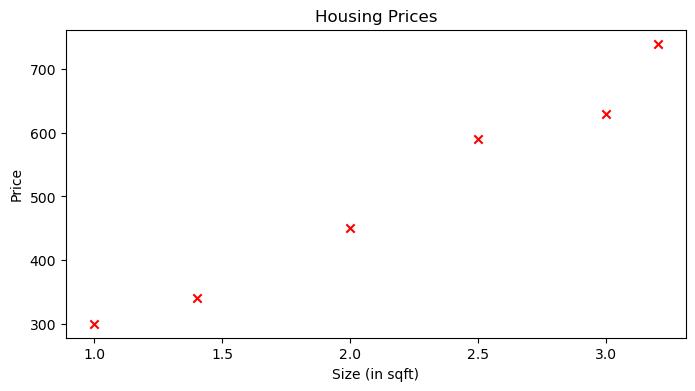

In [3]:
plt.figure(figsize=(8,4))
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Housing Prices")
plt.ylabel('Price')
plt.xlabel('Size (in sqft)')
plt.show()

## Simple linear regression model

**$$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$**

In [4]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

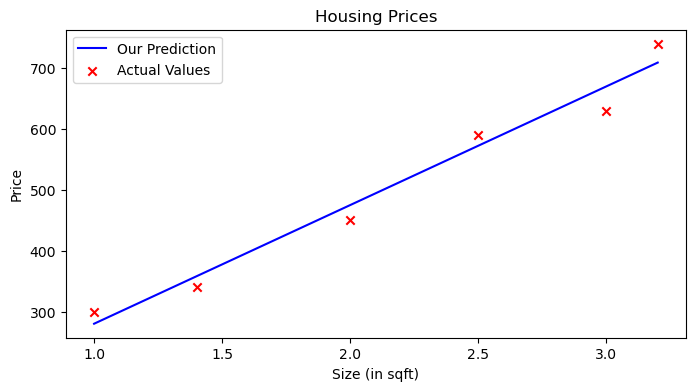

In [5]:
w = 195
b = 85 

tmp_f_wb = compute_model_output(x_train, w, b,)

plt.figure(figsize=(8,4))
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

plt.title("Housing Prices")
plt.ylabel('Price')
plt.xlabel('Size (in sqft)')
plt.legend()
plt.show()

## Computing Cost

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

In [1]:
def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})\\
\end{align}
$$

In [7]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [8]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each itertion primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient function
        dj_dw, dj_db = gradient_function(x, y, w, b)
        
        # Update Parameters using equation above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        
        # Save cost J at each iteration
        if i<1000000:    # prevent resource exhaustion
            J_history.append( cost_function(x, y, w, b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db:0.3e} ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w, b, J_history, p_history  # return w and J,w history for graphing

In [9]:
# Initialize parameters
w_init = 0
b_init = 0

# Some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2

# Run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f}, {b_final:8.4f})")

Iteration    0: Cost 1.24e+05  dj_dw: -1.235e+03, dj_db: -5.083e+02  w:  1.235e+01, b: 5.08333e+00
Iteration 1000: Cost 3.48e+02  dj_dw:  3.561e-02, dj_db: -8.654e-02  w:  1.952e+02, b: 8.20689e+01
Iteration 2000: Cost 3.48e+02  dj_dw:  1.287e-02, dj_db: -3.128e-02  w:  1.950e+02, b: 8.26117e+01
Iteration 3000: Cost 3.48e+02  dj_dw:  4.653e-03, dj_db: -1.131e-02  w:  1.949e+02, b: 8.28079e+01
Iteration 4000: Cost 3.48e+02  dj_dw:  1.682e-03, dj_db: -4.088e-03  w:  1.949e+02, b: 8.28789e+01
Iteration 5000: Cost 3.48e+02  dj_dw:  6.080e-04, dj_db: -1.478e-03  w:  1.949e+02, b: 8.29045e+01
Iteration 6000: Cost 3.48e+02  dj_dw:  2.198e-04, dj_db: -5.342e-04  w:  1.948e+02, b: 8.29138e+01
Iteration 7000: Cost 3.48e+02  dj_dw:  7.945e-05, dj_db: -1.931e-04  w:  1.948e+02, b: 8.29171e+01
Iteration 8000: Cost 3.48e+02  dj_dw:  2.872e-05, dj_db: -6.981e-05  w:  1.948e+02, b: 8.29183e+01
Iteration 9000: Cost 3.48e+02  dj_dw:  1.038e-05, dj_db: -2.523e-05  w:  1.948e+02, b: 8.29188e+01
(w,b) foun

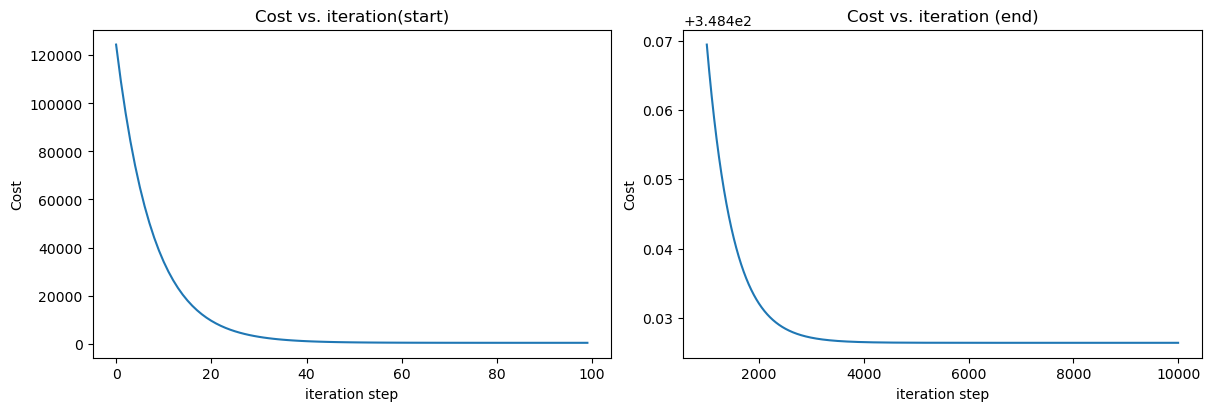

In [10]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])

ax1.set_title("Cost vs. iteration(start)")
ax1.set_xlabel('iteration step')
ax1.set_ylabel('Cost')

ax2.set_title("Cost vs. iteration (end)")
ax2.set_ylabel('Cost') 
ax2.set_xlabel('iteration step') 
plt.show()

In [11]:
def predModel(val_x):
    y_hat = w_final*val_x + b_final
    tmp_f_wb = compute_model_output(x_train, w_final, b_final,)
    
    plt.figure(figsize=(8,4))
    plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
    plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
    plt.scatter(val_x, y_hat, marker='^', c='g',label='Predicted Value')
    plt.annotate(f"x={val_x}\n y_hat={y_hat:.2f}", (val_x, y_hat), textcoords="offset points", xytext=(-15,15), ha='center', fontsize=10)
 
    plt.title("Housing Prices")
    plt.ylabel('Price (in 1000s)')
    plt.xlabel('Size (in sqft)')
    plt.legend()
    plt.show()

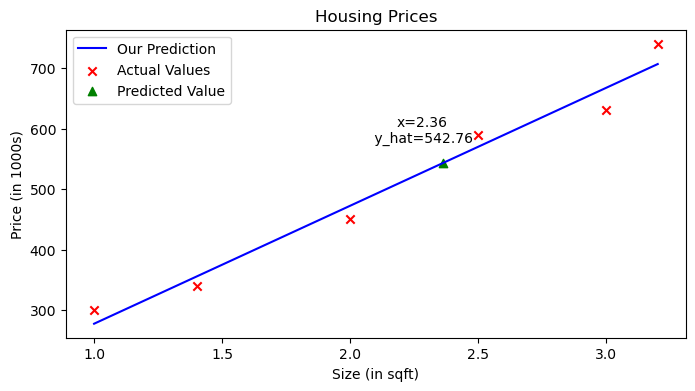

In [12]:
predModel(2.36)